## HEART DISEASE ANALYSIS

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

**<font color='red'>MOST IMPORTANT**
<font color='blue'>In this given data the feature **target** represents whether a person has heart disease or does'nt has heart disease 

***<font color='red'>target*** 
<font color='black'>
- **0 (Heart Disease)**
- **1 (No Heart Disease)**
----
<font color='black'>

**<font color='blue'>Also in our given data row numbers 93, 139, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs (so they should be removed)
data 49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset. Thanks to @IntiPic for finding out this errors.**<br>
    
**Discussion Link** -https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877    
**Check the original dataset** https://archive.ics.uci.edu/ml/datasets/heart+Disease



**Content**

- [Import Libraries](#1)<br>
- [Load Data and description of data](#1)<br>

**EDA**

- [Age](#2)<br>
  - [Hypothesis Testing(Two Sample t-Test)](#3)<br>
- [Chest Pain Type](#4)<br>
  - [Hypothesis Testing(Chi-Square Goodness of Fit Test)](#5)<br>
- [Maximum heart rate (thalach)](#6)<br>
  - [Hypothesis Testing(Two Sample t-Test)](#7)<br>
- [Resting blood pressure(trestbps)](#8)<br>
- [Cholestoral](#9)<br>
  - [Association Rule Mining](#10)<br>
- [Age vs Sex vs Target](#11)<br>
- [BPS vs cp vs target](#12)<br>
- [Fbs vs target vs age](#13)<br>
- [chol vs target vs sex](#14)<br>
  - [Hypothesis Testing(Two Sample t-Test)](#15)<br>
- [exang vs target vs thalach](#16)<br>
- [thal vs target vs cp](#17)<br>
- [ca vs target vs sex](#18)<br>
- [cp vs exang vs target](#19)<br>
- [olepeak vs target vs slope](#20)<br>
- [Pairplot](#21)<br>
- [Heatmap (Correlation)](#22)<br>

[Encoding Features](#23)<br>
[Recursive Feature Elimination](#24)<br>
[Modelling](#25)<br>
[Compare Models](#26)<br>

### Import Libraries <a id='1'></a>

In [331]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

color = sn.color_palette()
sn.set_style("ticks")
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

#### Load the data

In [332]:
data = pa.read_csv('heart.csv')

In [333]:
print(data.shape)
print('Length of the data {}'.format(len(data)))
print(data.info())

(303, 14)
Length of the data 303
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [334]:
data = data.drop([48 ,281,  92, 158, 163, 164, 251],axis=0).reset_index(drop=True)

In [335]:
#Missing Values
data.isnull().sum().sum()

0

**Quite Lucky no missing values**

##### Description of the data

In [336]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


## Exploratory Data Analysis

### Distribution of each contineous variable

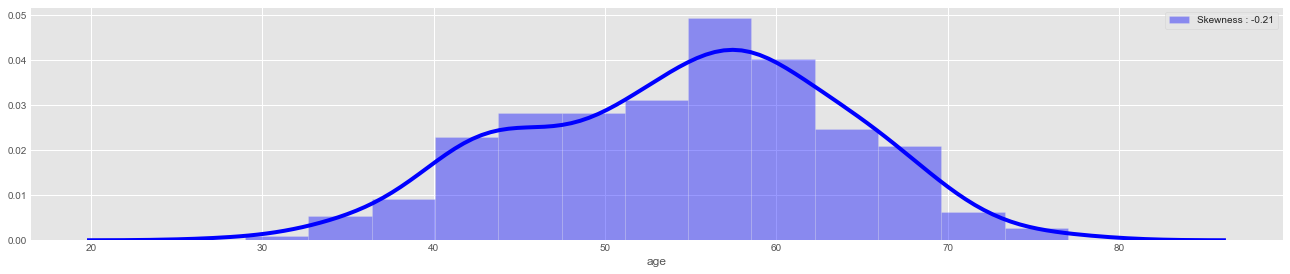

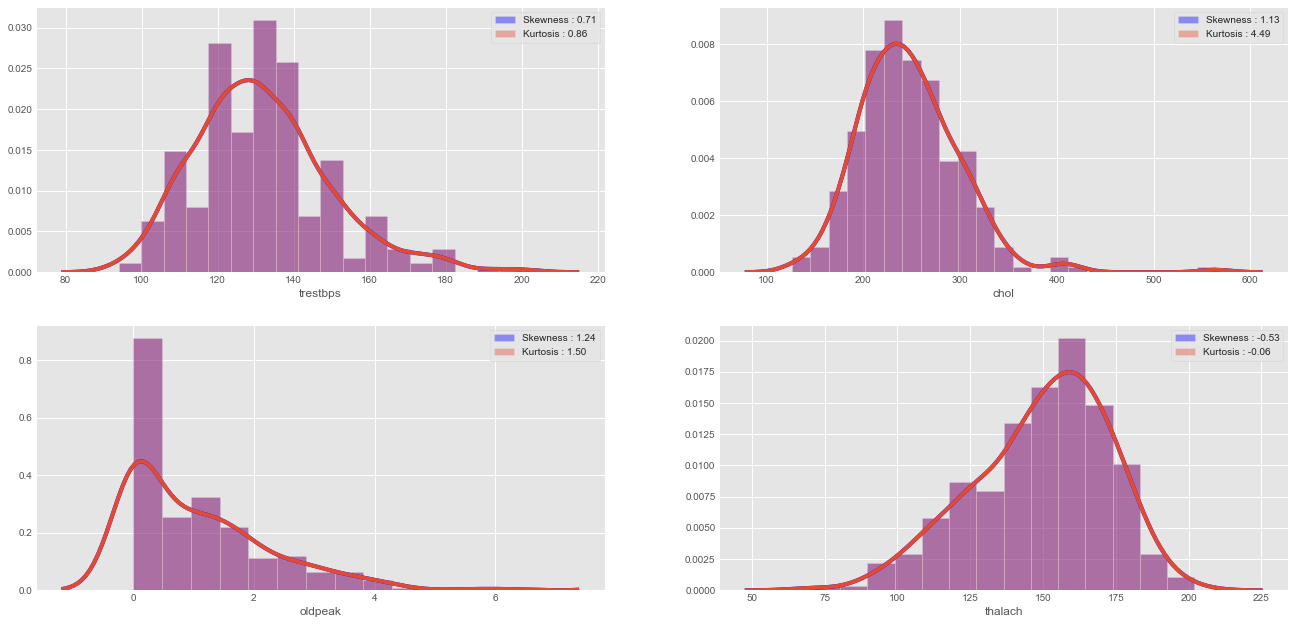

In [337]:
plt.figure(figsize=(20,4))
sn.distplot(data['age'],color='blue',label='Skewness : %.2f'%data['age'].skew())
plt.legend()

features = ['trestbps','chol','oldpeak','thalach']
plt.figure(figsize=(20,10))

for i in range(1, 5):
    ax=plt.subplot(2, 2, i)
    ax=sn.distplot(data[features[i-1]],label='Skewness : %.2f'%data[features[i-1]].skew(),color='blue')
    ax=sn.distplot(data[features[i-1]],label='Kurtosis : %.2f'%data[features[i-1]].kurtosis())

    plt.legend(loc='best')

**Skewness** - Skewness is the messure of symmetry or lack of symmetry.The value should be close to 0 if it's symmetrical(Normally Distributed).<br>
**Kurtosis** - Kurtosis is another measure of shape i.e shape of the tail of the distribution whether the tail is heavy or light.Kurtosis value less than 3 is known as platykurtic distribution and greater than 3 is called leptokurtic distribution.
<br>
**Findings:**

- ***From the above plots it seems that all features is normaly distributed except oldpeak and chol later we will perform normality test for checking whether all our continous features is normaly distributed or not.***

### Normality Test

Here I will use **stats.normaltest** to verify whether our data is normally distributed or not

**stats.normaltest**
 - Test whether a sample differs from a normal distribution.This function tests the null hypothesis that a sample comes from a normal distribution.

**Null Hypothesis** -        H0 : sample comes from a normal distribution(Normally Distributed)<br>
**Alternative Hypothesis**-  H1 : sample doesn't comes from a normal distribution(Not Normally Distributed)

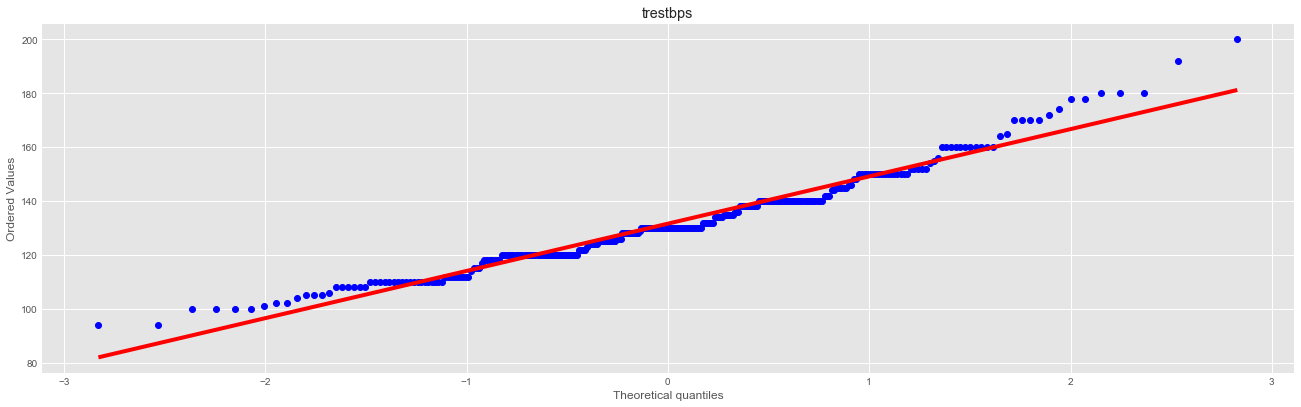

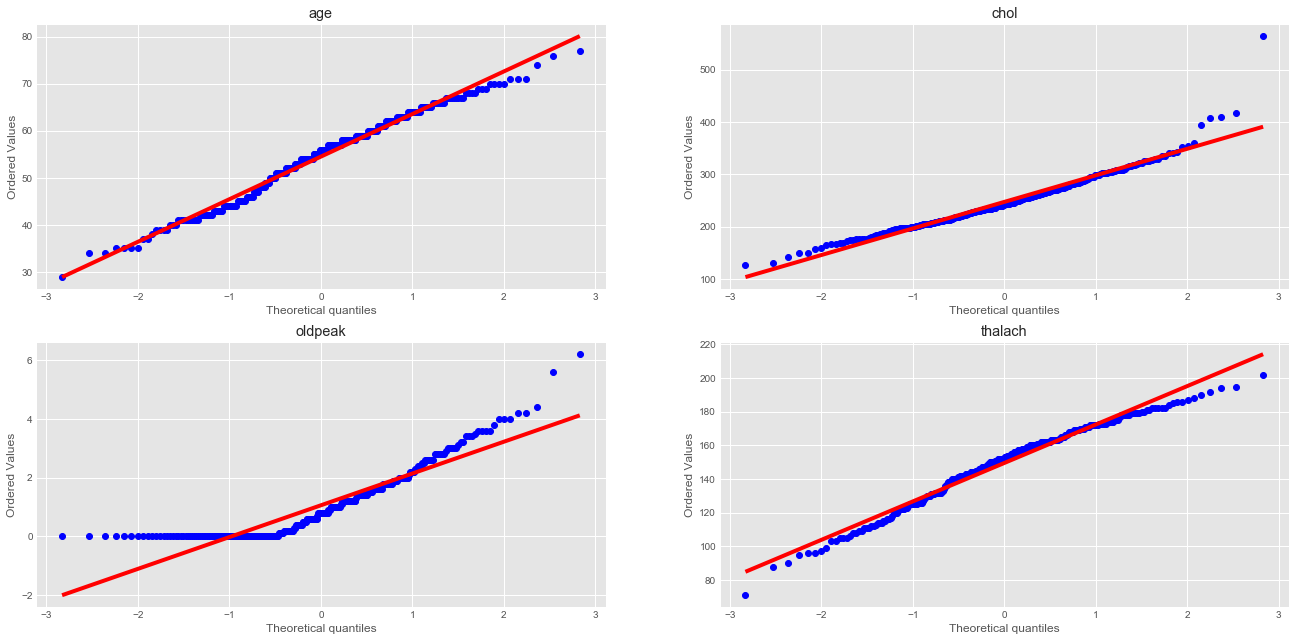

In [338]:
plt.figure(figsize=(20,6))
stats.probplot(data['trestbps'],dist="norm",plot=plt)
plt.title('trestbps')

features = ['age','chol','oldpeak','thalach']
plt.figure(figsize=(20,10))

for i in range(1, 5):
    ax=plt.subplot(2, 2, i)
    ax=stats.probplot(data[features[i-1]],dist="norm",plot=plt)
    plt.title(features[i-1])

stats.probplot <br>

Calculate quantiles for a probability plot, and optionally show the plot.

Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.

Quick Trick
- **If the data is normally distributed then the points will placed over the line, it seems like age, chol and thalach is normally distributed**

In [339]:
columns = ['age','trestbps','chol','oldpeak','thalach']
for i in columns:
    alpha= 0.001#singificance-level
    k2,p = stats.normaltest(data[i],nan_policy='omit')
    
    if p>alpha:
        print('{} ----- Normally distributed (Retain the null hypothesis)'.format(i))
    else:
        print('{} -----  Not normally distributed (Reject the null hypothesis)'.format(i))

age ----- Normally distributed (Retain the null hypothesis)
trestbps -----  Not normally distributed (Reject the null hypothesis)
chol -----  Not normally distributed (Reject the null hypothesis)
oldpeak -----  Not normally distributed (Reject the null hypothesis)
thalach ----- Normally distributed (Retain the null hypothesis)


### Age<a id='2'></a>

[Text(0.5, 0, 'Age Without Heart Disease')]

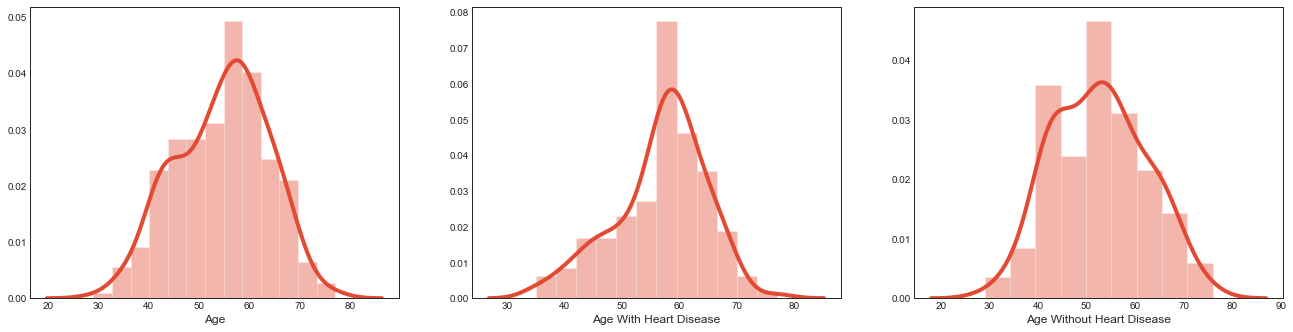

In [340]:
sn.set_style("ticks")

age_heart_disease = data.groupby('target')['age']

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20,5))
ax = sn.distplot(data['age'],ax=axis1)
ax.set(xlabel='Age')
ax = sn.distplot(age_heart_disease.get_group(0),ax=axis2)
ax.set(xlabel='Age With Heart Disease')
ax = sn.distplot(age_heart_disease.get_group(1),ax=axis3) 
ax.set(xlabel='Age Without Heart Disease')

### Hypothesis Testing<a id='3'></a>

In [341]:
groups_mean = data.groupby('target')['age'].mean()
groups_std = data.groupby('target')['age'].std()

groups = pa.DataFrame({'Group':[0,1],'Sample_Age_Mean':groups_mean.values,'Sample_Age_Std':groups_std.values,'Sample_Size':
                      [len(data.age[data['target'] == 0]),len(data.age[data['target'] == 1])]})
groups

,Group,Sample_Age_Mean,Sample_Age_Std,Sample_Size
0,0,56.735294,7.923930,136
1,1,52.643750,9.551151,160


### <font color='red'>Two Sample t-Test with Unequal Variance 

Assumption of Two sample t-Test:

- The size of both samples must be greater than 30(at least)
- The samples are drawn from two normally distributed population.


Here I am interested in finding the difference between the population parameter (mean of age) of the person having heart disease and not having heart disease or in simple terms it means that I am interested in finding the average age of the person based on whether or not he/she had heart disease. 

Two Groups are there Group A(0) consist of the people who have heart disease and Group B(1) consist of people who don't have heart disease. The sample mean and the standard deviation is known in this case. So, at **alpha**=0.05 (95 % confident) test whether the average age of the person having a heart disease is more than the person who doesn't have heart disease.

**<font color='blue'>Null Hypothesis** -:     		H0 : uA - uB <= 0 <br>
**<font color='blue'>Alternative Hypothesis**: -	HA : uA - uB  >   0

**u1** and **u2** are the population means of age of person have heart disease and does not have heart disease

**XB_bar** - 52.643750 <br>
**XA_bar** - 56.735294 <br>
**stdB_bar** - 9.551151 <br>
**stdA_bar** - 7.923930	 <br>
**nA** - 136  **nB** - 160 <br>


<img src='https://sites.nicholas.duke.edu/statsreview/files/2013/06/twosample.png' height="400" width="300">

#### Population Density Function of Age 

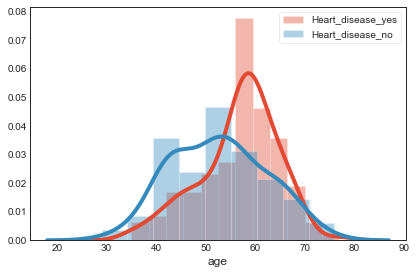

In [342]:
sn.distplot(age_heart_disease.get_group(0),label='Heart_disease_yes')
sn.distplot(age_heart_disease.get_group(1),label='Heart_disease_no')
plt.legend()

***<font color='green'>From the above figure, we can observe that the distribution of the age of the person who doesn't have heart disease shifted downward and to the left of those who have heart disease.***

#### <font color='red'>Scratch code for calculating Two Sample t-Test with Unequal Variance

-Formula for calculating degrees of Freedom for this t-test:<br>
    
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/bf9929fa7098ff7e57a5c421c0fdcb3eea20435f' height="400" width="300">


In [343]:
def t_test(mean1,mean2,u1_u2,n1,n2,std1,std2):
    t_stat = ((mean1 - mean2) - (u1_u2)) / np.sqrt((std1**2/n1)+(std2**2/n2))
    #print(t_stat)
    return t_stat

In [344]:
# **calculting degrees of freedom**
def degree_freedom(std1,std2,n1,n2):
    su = ((std1**2/n1)+(std2**2/n2))**2
    de = ((std1**2)/n1)**2/(n1-1) + ((std2**2)/n2)**2/(n2-1)
    df = np.round(su/de)
    return df

In [345]:
# T-statistic
print('The corrosponding t-statistic {}'.format(t_test(56.735294,52.643750,0,136,160,7.923930,9.551151)))
print('The corrosponding degrees of freedom {}'.format(degree_freedom(7.923930,9.551151,136,160)))
pvalues = 2*(1-stats.t.cdf(4.027932863828695,294))
print('P-values -> {} '.format(pvalues))

The corrosponding t-statistic 4.027932863828695
The corrosponding degrees of freedom 294.0
P-values -> 7.169120455596811e-05 


In [346]:
## U can also use this inbuilt library function for t-test
#from scipy import stats
stats.ttest_ind(data.age[data['target'] == 0],data.age[data['target'] == 1],equal_var=False)

Ttest_indResult(statistic=4.027932873262741, pvalue=7.17005192662898e-05)

**<font color='blue'>Ohh, we finally achieved a p-value less than 0.05 so we reject our null hypothesis and our alternative hypothesis is true that is the average age of the person having a heart disease is more than the person who doesn't have heart disease.**

### Chest Pain Type<a id='4'></a>

##### Distribution of chest pain

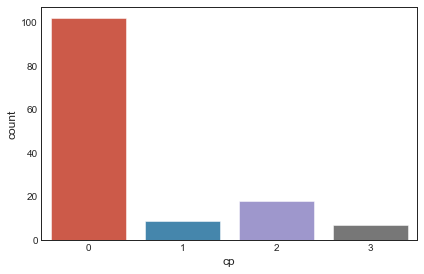

In [347]:
sn.countplot(data.cp[data['target']==0])

### <font color='red'>Chi-Square Goodness of Fit Test<a id='5'></a>

#### Chest Pain Type 
- Value 0: **asymptomatic** 
- Value 1: **atypical angina** 
- Value 2: **non-anginal pain** 
- Value 3: **typical angina**

It's believed by a doctor that among the patients who have heart disease 30% of them have asymptomatic chest pain, 25% have an atypical angina chest pain, 40% have a non-anginal pain and 5% have typical angina.
From the given sample of 136 patients who have heart disease test whether the belief of the doctor is true at **alpha**=0.05.

**<font color='blue'>Null Hypothesis** -:            Probability distribution of chest pain is P(asymptomatic)=0.30, P(atypical angina)=0.25, P(non-anginal pain)=0.40, P(typical angina) = 0.05
**<font color='blue'>Alternative Hypothesis**: -	  Probability distribution of chest pain is not defined in null hypothesis

<img src='https://www.thoughtco.com/thmb/ns7d4DC1AqVGme2p1-WYqC26r_s=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/latex_ac74fec08532861eb5f8b87226ebf396-5c59a6fcc9e77c00016b4195.jpg' height="400" width="300">

**Oi** - Observed Frequencies <br>
**Ei** - Expected Frequencies

In [348]:
obs = pa.crosstab(data['cp'],data.target[data['target']==0])
obs = [102,9,18,7]
exp = [136*0.30,136*0.25,136*0.40,136*0.05]
values = pa.DataFrame({'Observed_Freq':obs,'Expected_Freq':exp})
values

,Observed_Freq,Expected_Freq
0,102,40.8
1,9,34.0
2,18,54.4
3,7,6.8


In [349]:
#apply chi square test
stats.chisquare(values.Observed_Freq,values.Expected_Freq)

Power_divergenceResult(statistic=134.54411764705887, pvalue=5.671280693724878e-29)

***<font color='blue'>Cool, Here we can see that the p-value is less than 0.05 so we reject our null hypothesis(original claim) it means that the doctor's belief is False.***

### Maximum heart rate (thalach)<a id='6'></a>

[Text(0.5, 0, 'max heart rate Without Heart Disease')]

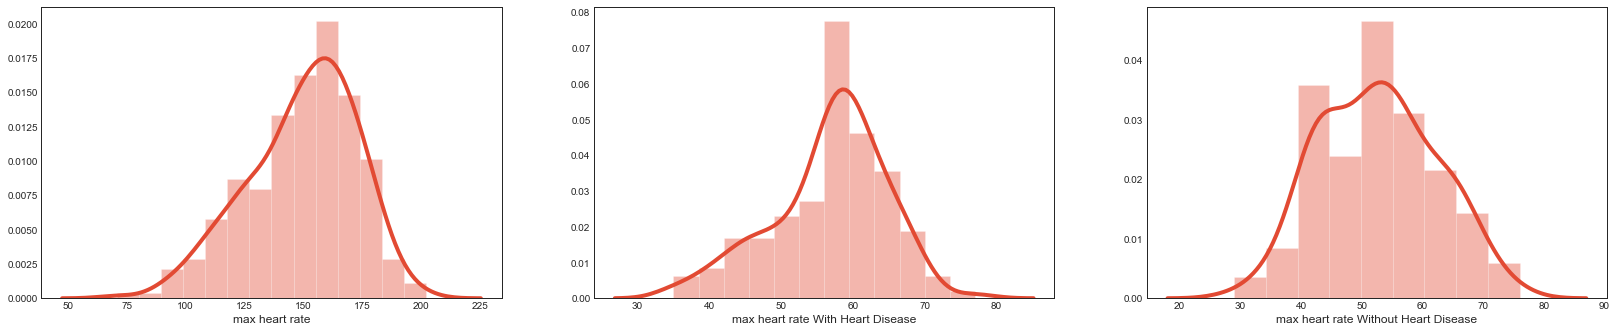

In [350]:
thal_heart_disease = data.groupby('target')['thalach']

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(25,5))
ax = sn.distplot(data['thalach'],ax=axis1)
ax.set(xlabel='max heart rate')
ax = sn.distplot(age_heart_disease.get_group(0),ax=axis2)
ax.set(xlabel='max heart rate With Heart Disease')
ax = sn.distplot(age_heart_disease.get_group(1),ax=axis3) 
ax.set(xlabel='max heart rate Without Heart Disease')

### <font color='red'>Two Sample t-Test with Unequal Variance <a id='7'></a>

In [351]:
groups_mean = data.groupby('target')['thalach'].mean()
groups_std = data.groupby('target')['thalach'].std()

groups = pa.DataFrame({'Group':[0,1],'Sample_thalach_Mean':groups_mean.values,'Sample_thalach_Std':groups_std.values,
                       'Sample_Size':[len(data.thalach[data['target'] == 0]),len(data.thalach[data['target'] == 1])]})
groups

,Group,Sample_thalach_Mean,Sample_thalach_Std,Sample_Size
0,0,138.948529,22.716064,136
1,1,158.581250,19.043304,160


<font color='green'>Suppose a man claimed that the patients who have heart disease have more thalach (maximum heart rate) than the person without heart disease.
At **alpha=0.05** test whether the maximum heart rate for the person who has heart disease is different from those who don't have heart disease

**<font color='blue'>Null Hypothesis** -:     		H0 : uA = uB<br>
**<font color='blue'>Alternative Hypothesis**: -	HA : uA != uB <br>
    
<font color='black'>
<br>

**uA** and **uB** are the population means of heart rate of person have heart disease and does not have heart disease
**XA_bar** - 138.948529 <br>
**XB_bar** - 158.581250 <br>
**stdA_bar** - 22.716064 <br>
**stdB_bar** - 19.043304		 <br>
**nA** - 136 **nB** - 160 <br>

<img src='https://sites.nicholas.duke.edu/statsreview/files/2013/06/twosample.png' height="400" width="300">

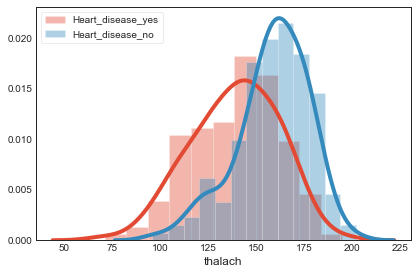

In [352]:
sn.distplot(thal_heart_disease.get_group(0),label='Heart_disease_yes')
sn.distplot(thal_heart_disease.get_group(1),label='Heart_disease_no')
plt.legend()

In [353]:
stats.ttest_ind(data.thalach[data['target'] == 0],data.thalach[data['target'] == 1],equal_var=False)

Ttest_indResult(statistic=-7.974715975613374, pvalue=4.627878027562763e-14)

***<font color='blue'>The probability of the samples belonging to the same distribution is almost near to zero and it is less than 0.05.This means that the heart rate for the person who have heart disease is significantly different from those who don't have***

#### Resting blood pressure<a id='8'>

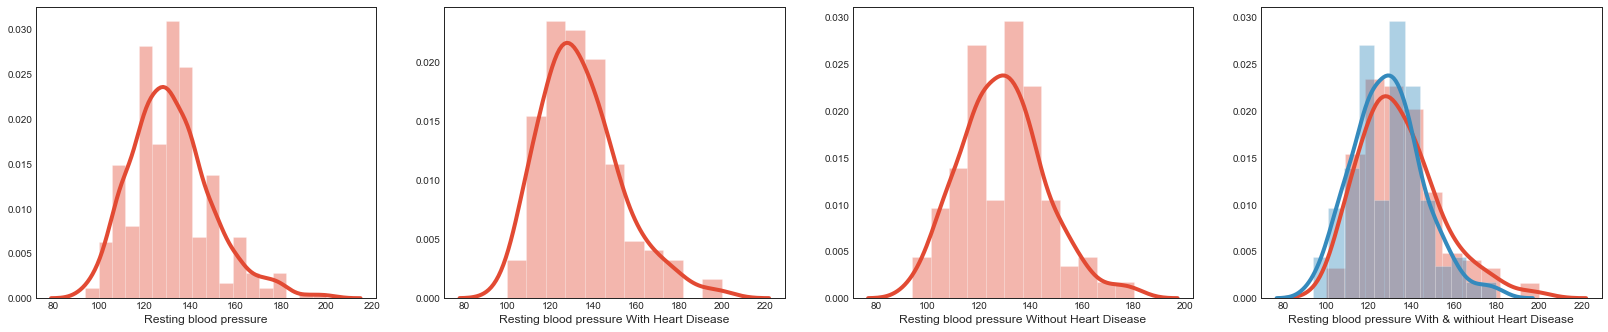

In [354]:
trestbps_heart_disease = data.groupby('target')['trestbps']

fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(25,5))
ax = sn.distplot(data['trestbps'],ax=axis1)
ax.set(xlabel='Resting blood pressure')
ax = sn.distplot(trestbps_heart_disease.get_group(0),ax=axis2)
ax.set(xlabel='Resting blood pressure With Heart Disease')
ax = sn.distplot(trestbps_heart_disease.get_group(1),ax=axis3) 
ax.set(xlabel='Resting blood pressure Without Heart Disease')
for i in range(0,2):
    ax=sn.distplot(trestbps_heart_disease.get_group(i),ax=axis4)
    ax.set(xlabel='Resting blood pressure With & withiout Heart Disease')

#### Cholestoral<a id='9'>

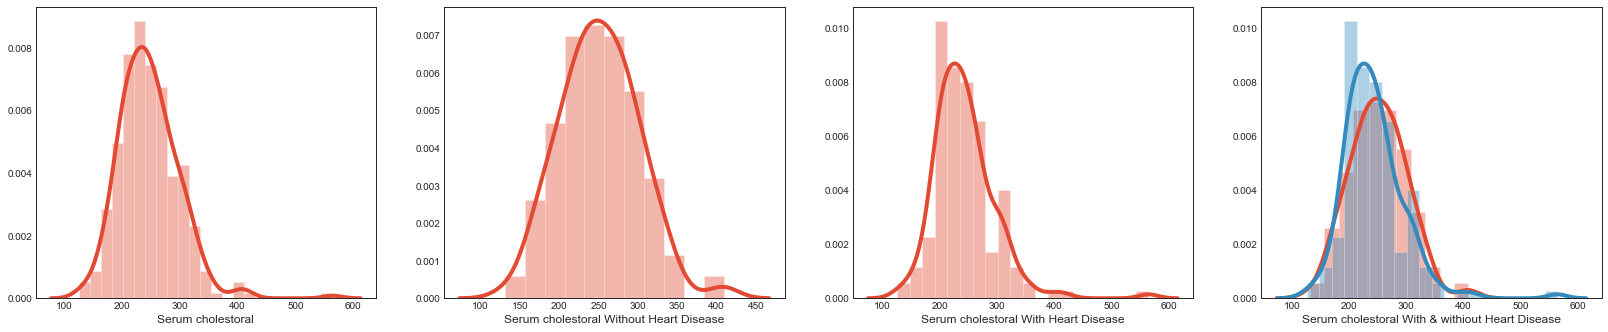

In [355]:
chol_heart_disease = data.groupby('target')['chol']

fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(25,5))
ax = sn.distplot(data['chol'],ax=axis1)
ax.set(xlabel='Serum cholestoral')
ax = sn.distplot(chol_heart_disease.get_group(0),ax=axis2)
ax.set(xlabel='Serum cholestoral Without Heart Disease')
ax = sn.distplot(chol_heart_disease.get_group(1),ax=axis3) 
ax.set(xlabel='Serum cholestoral With Heart Disease')
for i in range(0,2):
    ax=sn.distplot(chol_heart_disease.get_group(i),ax=axis4)
    ax.set(xlabel='Serum cholestoral With & withiout Heart Disease')

#### <font color='red'>Association Rule mining just for fun :)<a id='10'>
<font color='blue'>
- Here I will find what is the conditional probability of having heart disease given the person has angina after exercise(exang)<br>
<font color='black'><br>
    
**Angina is a type of chest pain caused by reduced blood flow to the heart. Angina is a symptom of coronary artery disease.**

*Angina, which may also be called angina pectoris, is often described as squeezing, pressure, heaviness, tightness or pain in your chest.*<br><br>
**Stable angina is the most common form of angina. It usually happens when you exert yourself and goes away with rest. For example, pain that comes on when you're walking uphill or in the cold weather is often angina.Develops when your heart works harder, such as when you exercise or climb stairs.**

In [356]:
z =pa.crosstab(data['target'],data['exang'],margins=True)
z

exang,0,1,All
target,,,
0,62,74,136
1,137,23,160
All,199,97,296


***<font color='green'>Here target 0 means the person have heart disease and 1 means person does not have heart disease & exang 0 means person who don't have angina after exercise and 1 means have angina.***

**<font color='red'>Support and Confidence**: <img src='https://blog.galvanize.com/wp-content/uploads/2016/02/support-confidence-formulas-1.jpg' height="400" width="400">

In [357]:
marginal_prob = (97/296) # marginal probability
support = (74/296)
confidence = (support/marginal_prob)
print(confidence)

0.7628865979381444


***<font color='red'>We got a confidence of 76% which means that if the person have angina after exercise(exang True) then that person has 76% probabilty of having a heart disease.***

#### Check the Target Variable

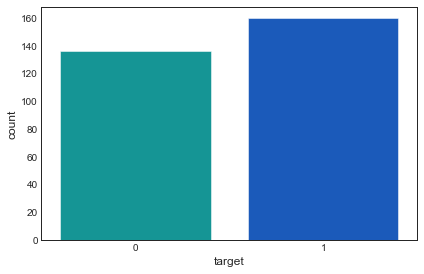

In [358]:
sn.countplot(data['target'],palette='winter_r')

Our target variable is quite balanced.

#### Age vs Sex vs Target<a id='11'>

In [359]:
x = []
for i in range(0,len(data)):
    if((data['age'][i] > 0) & (data['age'][i] < 20) ):
        x.append('0-20')
    elif((data['age'][i] > 20) & (data['age'][i] < 40) ):
        x.append('21-50')
    elif((data['age'][i] > 40) & (data['age'][i] < 60) ):
        x.append('51-60')
    else:
        x.append('> 60')
        
data['Group_Age'] = x

<Figure size 1800x432 with 0 Axes>

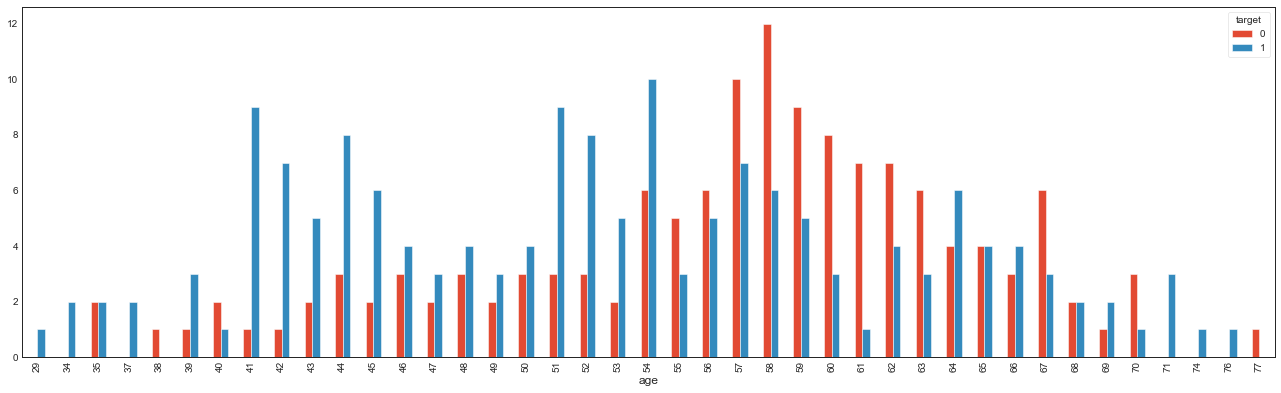

In [360]:
plt.figure(figsize=(25,6))
pa.crosstab(data['age'],data['target']).plot(kind="bar",figsize=(20,6))

Text(0.5, 1.0, 'Sex Vs Target')

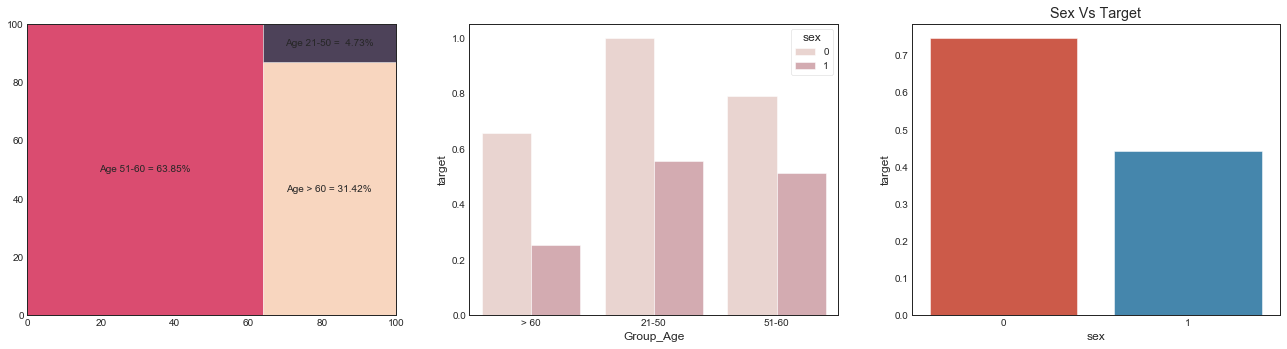

In [361]:
import squarify
fig,(axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20,5))
data['Group_Age'].value_counts()
labels = data['Group_Age'].value_counts().index
sizes = data['Group_Age'].value_counts().values

perc = [str('{:5.2f}'.format(i/data['Group_Age'].value_counts().sum()*100)) + "%" for i in data['Group_Age'].value_counts()]
lbl = ["Age" + " " + el[0] + " = " + el[1] for el in zip(data['Group_Age'].value_counts().index, perc)]
squarify.plot(sizes=sizes, label=lbl, alpha=.8,ax=axis1)


plt.title('Age Group Of Peoples')
sn.barplot(x='Group_Age',y='target',hue='sex',data=data,palette=sn.cubehelix_palette(),ci=None,ax=axis2)
plt.title('Age Group Vs Sex Vs Target')
sn.barplot(x='sex',y='target',data=data,ci=None,ax=axis3)
plt.title('Sex Vs Target')

#### Findings (target value 0 means have heart disease and 1 means no heart disease)
<font color='green'>
    
- From the above plot, we can see that the maximum heart disease is occurring for people over age 55.

- In our given data most people are 51-60 years old , some are above 60 and very few people are 21-50 years old.

- Heart disease is occurring mostly for people in the age group over 60. We already proved it using hypothesis testing that the average age of the person having a heart disease is more than the person who doesn't have heart disease.

- Females(1) are more likely to have heart disease than males(0). 

#### BPS vs CP vs Target<a id='12'>

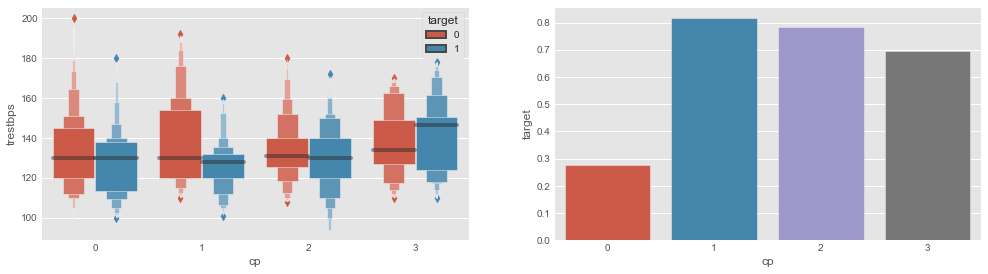

In [362]:
plt.style.use('ggplot')
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sn.boxenplot(x='cp',y='trestbps',hue='target',data=data,ax=axis1)
sn.barplot(x='cp',y='target',data=data,ci=None,ax=axis2)

<font color='red'>**Chest Pain Type:** -----  
- Value 0: **asymptomatic** 
- Value 1: **atypical angina** 
- Value 2: **non-anginal pain** 
- Value 3: **typical angina**

<font color='black'>***Asymptomatic means neither causing nor exhibiting symptoms of disease.***

<font color='green'>Many diseases or conditions do not display any symptoms and are therefore asymptomatic. For example, a cerebral aneurysm may not show any symptoms until it ruptures, at which point the symptoms become immediately evident. Most small cancers are asymptomatic until they reach an appreciable size.

**<font color='blue'>Here from the second figure we can see that if the person having asymptomatic chest pain then there is a maximum probabilty of having heart disease.This type of chest pain can lead to silent heart attack.Because of the lack of symptoms,silent heart attacks are rarely caught at the time of the event.Although these heart attacks do not exhibit symptoms, that does not mean they do no damage.**<br><br>


***"<font color='black'>The outcome of a silent heart attack is as bad as a heart attack that is recognized while it is happening. And because patients don't know they have had a silent heart attack, they may not receive the treatment they need to prevent another one."***

*Elsayed Z. Soliman, M.D., MSc., M.S.*

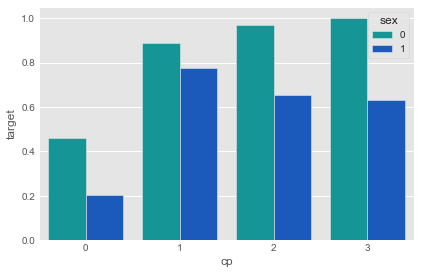

In [363]:
sn.barplot(x='cp',y='target',hue='sex',palette='winter_r',ci=None,data=data)

**<font color='|green'>Chest pain type - > Value 3: typical angina**

<font color='green'>Angina pectoris or typical angina is the discomfort that is noted when the heart does not get enough blood or oxygen. Typically, this is caused by blockage or plaque buildup in the coronary arteries. If one or more of the coronary arteries is partially or completely clogged, the heart will not get enough oxygen.

***<font color='black'>Angina may occur during activities such as climbing stairs, carrying groceries, or becoming upset, angry, or going outside into the cold air. Exercise and sexual activity may also cause the symptom to occur.***<br><br>

***<font color='red'>Men commonly have the usual kind of angina as described above.
Women may have more of a subtle presentation called atypical angina.***

<font color='red'>Resting blood presure is mostly same for all cases except in case of typical angina (check 1st figure)

### Fbs vs target vs age<a id='13'>

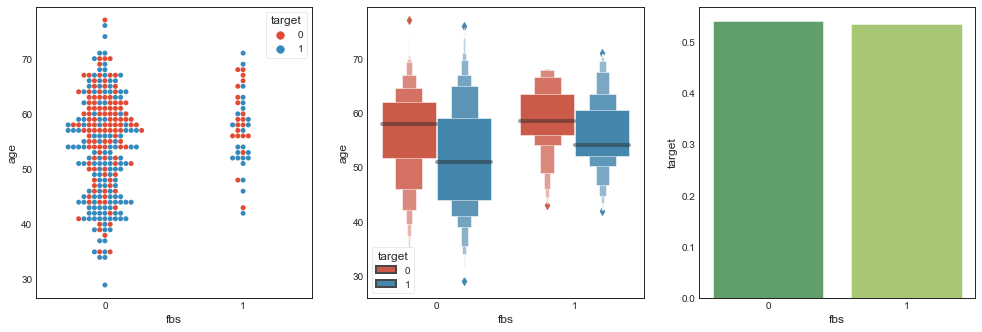

In [364]:
sn.set_style("ticks")

fig,(axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sn.swarmplot(x='fbs',y='age',hue='target',data=data,ax=axis1)
sn.boxenplot(x='fbs',y='age',hue='target' ,data=data,ax=axis2)
sn.barplot(x='fbs',y='target',data=data,palette='summer',ci=None,ax=axis3)

<font color='blue'>From the above figures we can see that if the person is having fbs(fasting blood sugar > 120 mg/dl) and have heart disease then the age of that person is greater than 55 or between 55 to 70.

#### chol vs target vs sex<a id='14'>

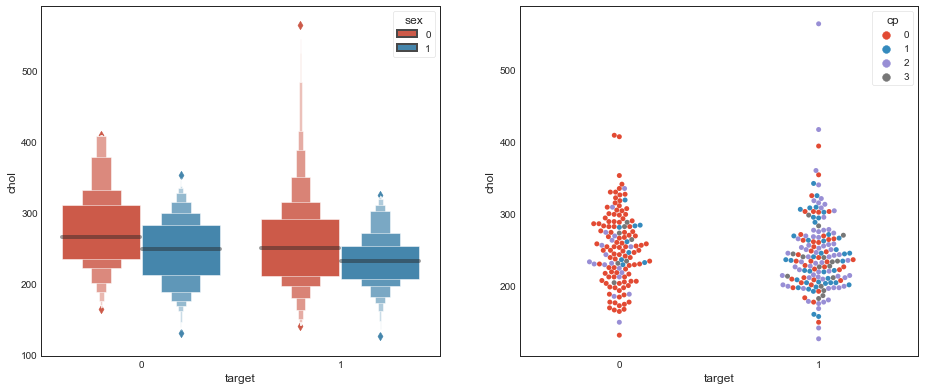

In [365]:
sn.set_style("ticks")

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(14,6))
sn.boxenplot(y='chol',x='target',hue='sex',data=data,ax=axis1)
sn.swarmplot(x='target',y='chol',hue='cp',data=data,ax=axis2)

**Serum cholesterol levels also show the amount of triglycerides present. Triglycerides are another lipid that can be measured in the blood.**

***<font color='green'>According to the American Heart Association, low-density lipoprotein (LDL) cholesterol is often considered bad, while high-density lipoprotein (HDL) cholesterol is considered good.***

A person's serum cholesterol level can indicate their risk for conditions such as heart disease.

Here from the above figures we can conclude that if the person has heart disease the serum cholesterol levels are between 200 to 300 and most of them have Asymptomatic chest pain.

**Hypercholesterolemia**,<font color='green'> also called high cholesterol, is the presence of high levels of cholesterol in the blood.It is a form of hyperlipidemia, high blood lipids, and hyperlipoproteinemia (elevated levels of lipoproteins in the blood).
Although hypercholesterolemia itself is asymptomatic, longstanding elevation of serum cholesterol can lead to atherosclerosis (hardening of arteries).Over a period of decades, elevated serum cholesterol contributes to formation of atheromatous plaques in the arteries. This can lead to progressive narrowing of the involved arteries. Alternatively smaller plaques may rupture and cause a clot to form and obstruct blood flow.**<font color='black'>A sudden blockage of a coronary artery may result in a heart attack. A blockage of an artery supplying the brain can cause a stroke. If the development of the stenosis or occlusion is gradual, blood supply to the tissues and organs slowly diminishes until organ function becomes impaired.**

### <font color='red'>Two Sample t-Test with Unequal Variance <a id='15'>

##### Hypothesis testing  of Serum cholesterol levels and target

- I will perform a hypothesis test to check the difference between the population mean of serum cholesterol levels of the person who have heart disease and the person who doesn't have heart disease at **alpha=0.05**.

 **<font color='blue'>Null Hypothesis** :-        H0: u0 = u1<br>
 **<font color='blue'>Alternative Hypothesis** :- H0: u0 != u1
 

In [366]:
groups_mean = data.groupby('target')['chol'].mean()
groups_std = data.groupby('target')['chol'].std()

groups = pa.DataFrame({'Group':[0,1],'Sample_chol_Mean':groups_mean.values,'Sample_chol_Std':groups_std.values,
                       'Sample_Size':[len(data.thalach[data['target'] == 0]),len(data.thalach[data['target'] == 1])]})
groups

,Group,Sample_chol_Mean,Sample_chol_Std,Sample_Size
0,0,251.463235,49.651811,136
1,1,243.493750,53.757550,160


In [367]:
stats.ttest_ind(data.chol[data['target'] == 0],data.chol[data['target'] == 1],equal_var=False)

Ttest_indResult(statistic=1.324775726823215, pvalue=0.1862815232446321)

<font color='green'>**Cool, the p-value is 0.186 which is greater than 0.05 so we retain our null hypothesis that there is no significant difference between the population mean of serum cholesterol levels of the person who has heart disease and the person who doesn't have heart disease.** **<font color='black'>This can be a type 2 error in the hypothesis test i.e the conditional probability of accepting/retaining the null hypothesis given our null hypothesis is false. Type 2 error can be solved by increasing the test sample size. Because of the small size of our sample(dataset), this type 2  error occured.**
    
<img src='http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS4-OneSampleTtest/Figure1.PNG' height='400' width='300'>

#### exang vs target vs thalach<a id='16'>

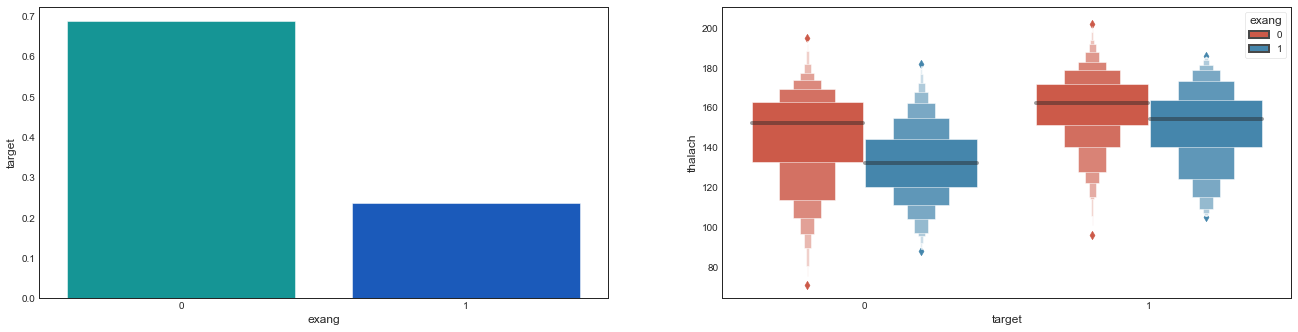

<Figure size 1440x576 with 0 Axes>

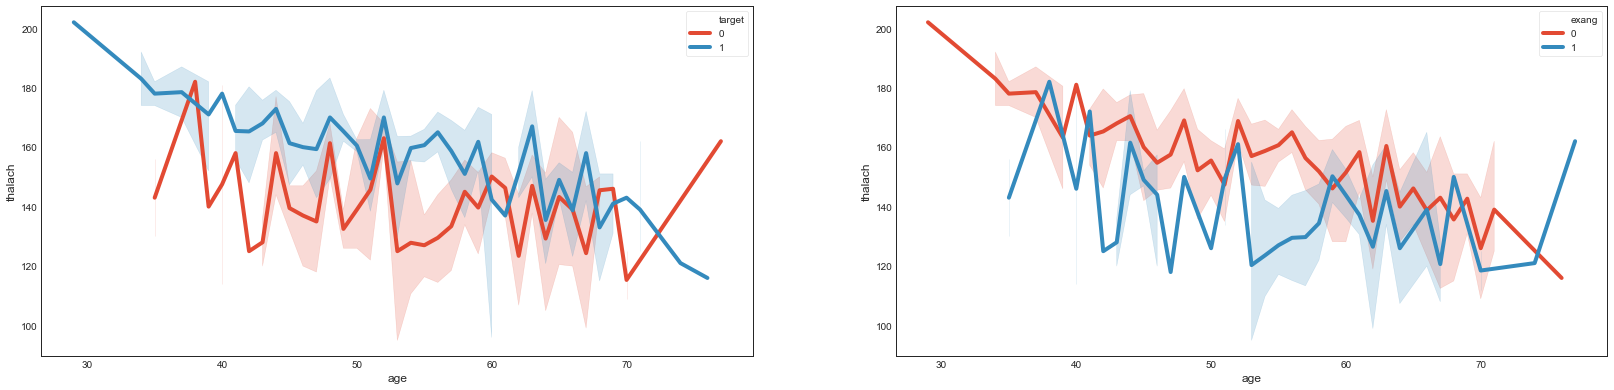

In [368]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,5))

sn.barplot(x='exang',y='target',data=data,palette='winter_r',ci=None,ax=axis1)
sn.boxenplot(x='target',y='thalach',hue='exang',data=data,ax=axis2)
plt.figure(figsize=(20,8))

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(25,6))
sn.lineplot(x='age',y='thalach',hue='target',data=data,ax=axis1)
sn.lineplot(x='age',y='thalach',hue='exang',data=data,ax=axis2)


**The maximum heart rate is calculated by subtracting age from 220 for example if the age of a person is 60 then the maximum heart rate(thalach) will be 220-60 = 160.**
<font color='blue'>From the above plots, we can see that age and maximum heart rate has an inverse relationship as age increases maximum heart rate decreases. <font color='green'>**If you notice the first line plot if the person has heart disease then the maximum heart rate is low. Which means old peoples are more likely to have heart disease which we already proved during hypothesis testing that the average age of the person having a heart disease is more than the person who doesn't have heart disease.**

### thal vs target vs cp<a id='17'>

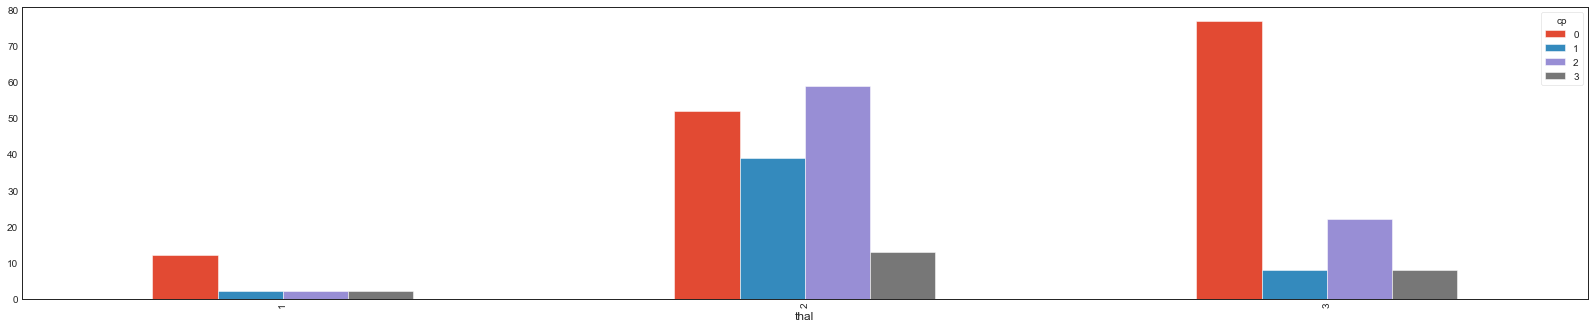

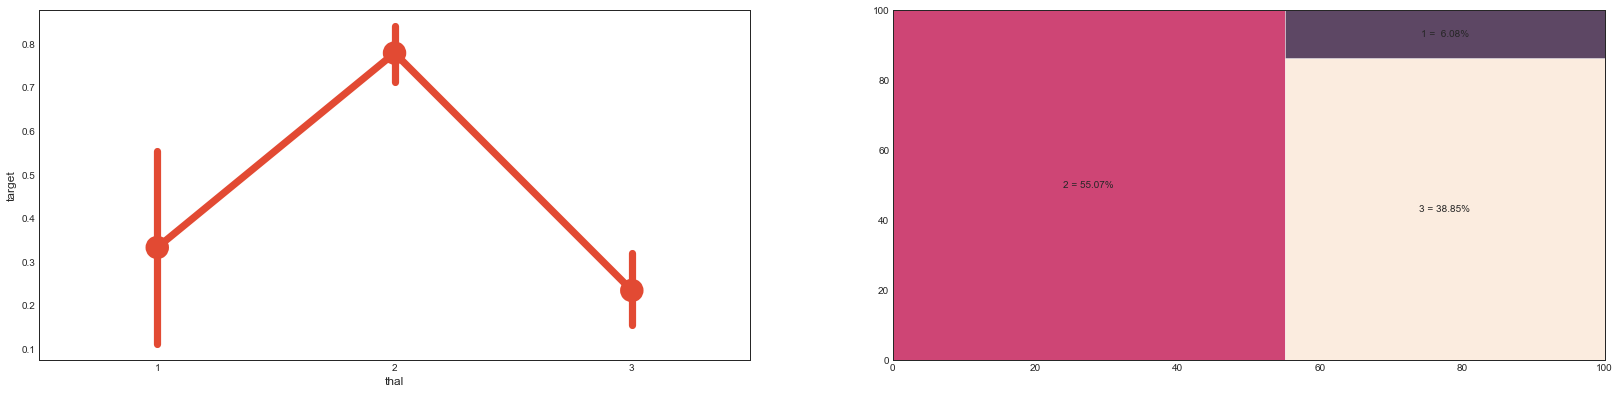

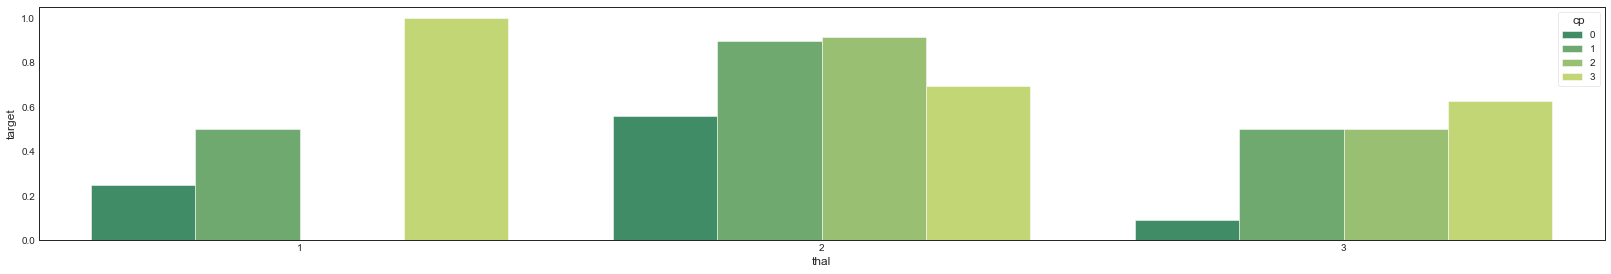

In [369]:
pa.crosstab(data['thal'],data['cp']).plot(kind="bar",figsize=(25,5))

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(25,6))


#sn.barplot(x='thal',y='target',data=data,palette='winter_r',ci=None,ax=axis1)
sn.pointplot(x='thal',y='target',data=data,ax=axis1)

labels = data['thal'].value_counts().index
sizes = data['thal'].value_counts().values

perc = [str('{:5.2f}'.format(i/data['thal'].value_counts().sum()*100)) + "%" for i in data['thal'].value_counts()]
lbl = [str(el[0]) + " = " + el[1] for el in zip(data['thal'].value_counts().index, perc)]
squarify.plot(sizes=sizes, label=lbl, alpha=.8,ax=axis2)

plt.figure(figsize=(25,4))
sn.barplot(x='thal',y='target',hue='cp',palette='summer',ci=None,data=data)


**<font color='red'>Thal columns description:**

*<font color='blue'>A nuclear stress test uses radioactive dye and an imaging machine to create pictures showing the blood flow to your heart. The test measures blood flow while you are at rest and are exerting yourself, showing areas with poor blood flow or damage in your heart.*

*<font color='green'>The test usually involves injecting radioactive dye, then taking two sets of images of your heart — one while you're at rest and another after exertion.*

<font color='green'>Nuclear stress testing requires the injection of a tracer, commonly technicium 99M (Myoview or Cardiolyte), which is then taken up by healthy, viable myocardial cells. A camera (detector) is used afterwards to image the heart and compare segments. A coronary stenosis is detected when a myocardial segment takes up the nuclear tracer at rest, but not during cardiac stress. This is called a "reversible defect." Scarred myocardium from prior infarct will not take up tracer at all and is referred to as a "fixed defect."

**<font color='red'>Findings from the above plots** : 

- From the first figure, we can see that asymptomatic chest pain is common in patients who have fixed defects (thal 1) and reversible defect. If the person has thal 0(normal) then the frequencies of occurring all types of chest pain is high except typical angina.

- Reversible defect and fixed defect are dangerous because if a person has this type of defects then chances are very high of heart disease.

- In our given data most people are thal 2(normal) and Reversible defect, and very few people have fixed defect.

- In case of people who have thal 1 and thal 2 i.e fixed defect and reversible defect, all types of chest pain asymptomatic atypical angina,non-anginal pain, typical angina are dangerous.

### ca vs target vs sex<a id='18'>

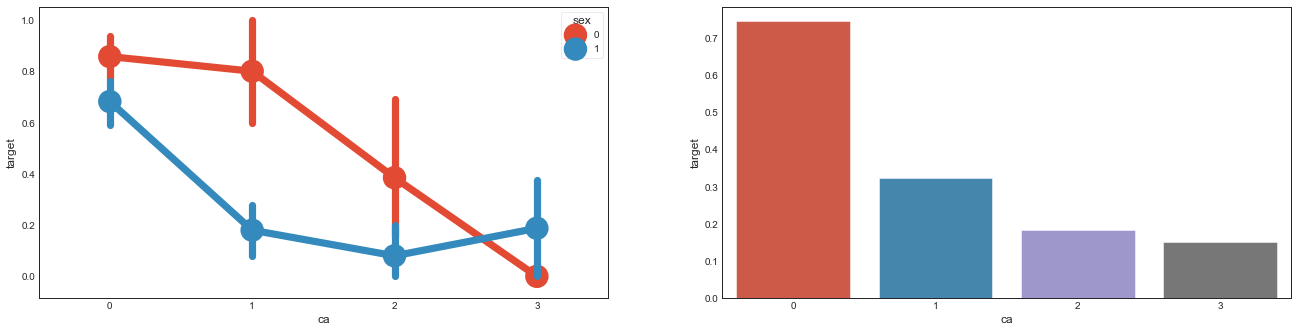

In [370]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,5))

#sn.barplot(x='ca',y='target',hue='sex',data=data,palette='winter_r',ci=None,ax=axis1)
sn.pointplot(x='ca',y='target',hue='sex',data=data,ax=axis1)
sn.barplot(x='ca',y='target',data=data,ci=None,ax=axis2)

**<font color='blue'>ca-number of major vessels (0-3) colored by flourosopy**
People with ca(3), ca(2), ca(1) are more likely to have heart disease.

### cp vs exang vs target<a id='19'>

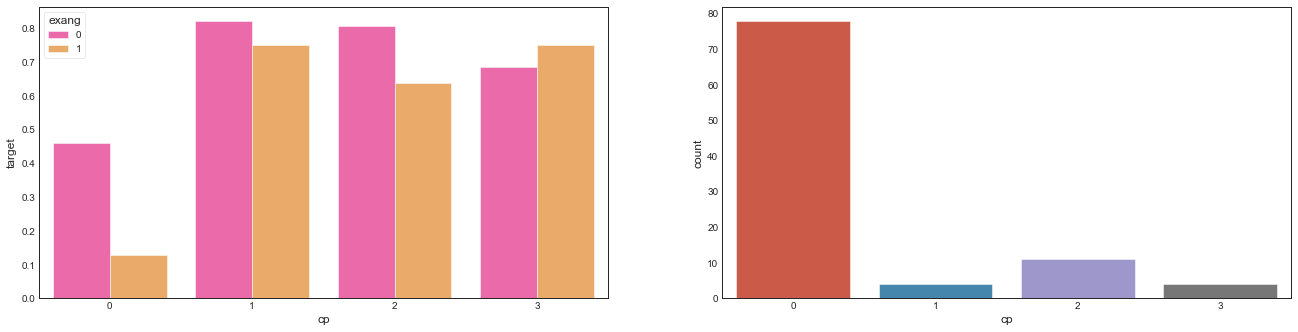

In [371]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,5))

sn.barplot(x='cp',y='target',hue='exang',data=data,palette='spring',ci=None,ax=axis1)
sn.countplot(data.cp[data['exang'] == 1],ax=axis2)

<font color='green'>***If you notice in figure 2(chest pain of the person who has exercise-induced angina) it looks almost the same as the figure in the hypothesis testing section (chi-square goodness of fit test for chest pain of the person who has heart disease). So we conclude that peoples who have exercise-induced angina the frequencies of occurring asymptomatic chest pain is highest and also they are more likely to have heart disease.***

### oldpeak vs target vs slope<a id='20'>

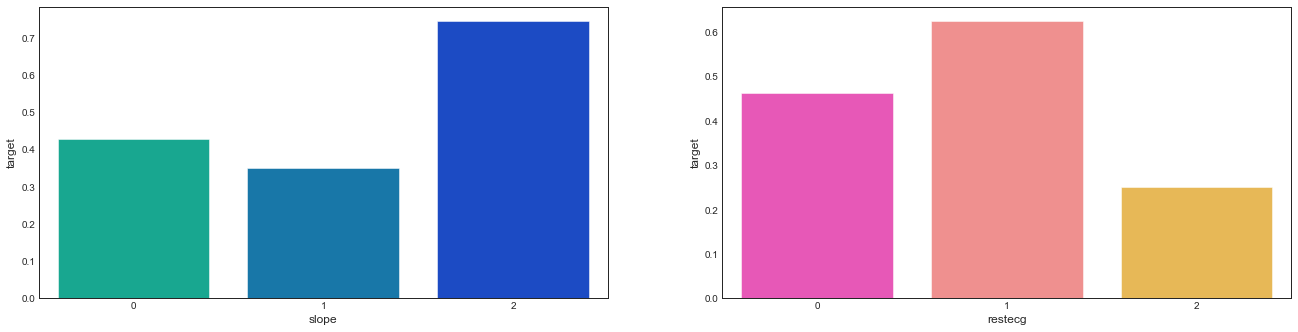

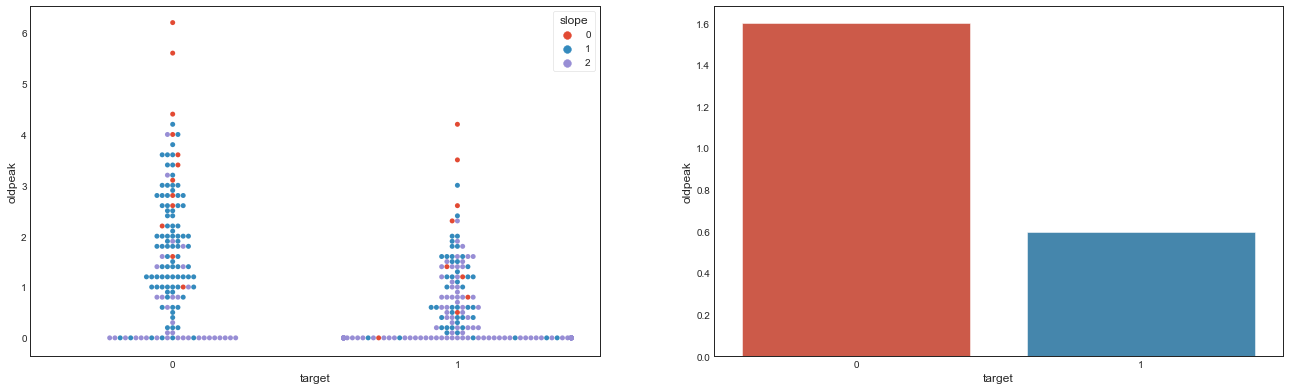

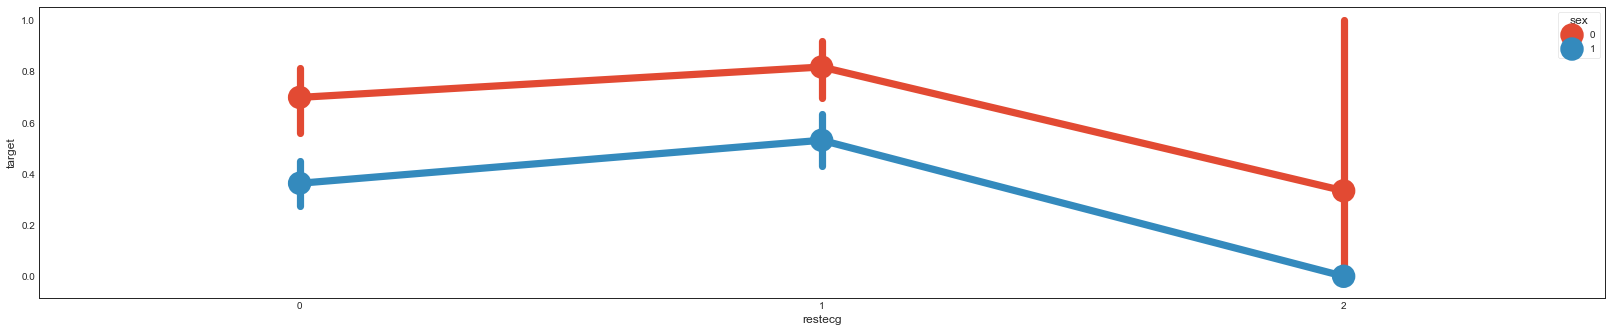

In [372]:
#plt.figure(figsize=(25,5))
#sn.lineplot(x='oldpeak',y='target',hue='slope',data=data)
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sn.set_style("ticks")


fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,5))

sn.barplot(x='slope',y='target',data=data,palette='winter_r',ci=None,ax=axis1)
sn.barplot(x='restecg',y='target',data=data,palette='spring',ci=None,ax=axis2)
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,6))
sn.swarmplot(x='target',y='oldpeak',hue='slope',data=data,ax=axis1)
sn.barplot(x='target',y='oldpeak',data=data,ci=None,ax=axis2)

plt.figure(figsize=(25,5))

sn.pointplot(x='restecg',y='target',hue='sex',data=data)

<font color='green'>In electrocardiography, the **ST segment** connects the QRS complex and the T wave and has a duration of 0.005 to 0.150 sec (5 to 150 ms).

**ST depression** refers to a finding on an electrocardiogram,wherein the trace in the ST segment is abnormally low below the baseline.

<font color='black'>**ST depression can be either upsloping, downsloping, or horizontal.**

<font color='green'>Horizontal or downsloping ST depression indicates <font color='red'>**myocardial ischaemia**<font color='green'>(Myocardial ischemia occurs when blood flow to your heart is reduced, preventing the heart muscle from receiving enough oxygen. The reduced blood flow is usually the result of a partial or complete blockage of your heart's arteries (coronary arteries))


Upsloping ST depression in resting electrocardiogram may indicate <font color='red'>**cardiac ischemia** <font color='green'>in the presence of active cardiac symptoms. In the absence of ongoing symptoms however, it may be secondary to conditions other than ischemia.

**<font color='red'>Findings from the above plots** : 

<font color=']green'>***We can see from the swarm plot that slope(1) and slope(0) i.e flat and downsloping st-depression is much more commmon when the person has heart disease.If the person has  ST depression downsloping, or horizontal then chance of having heart disease is maximum(figure-1).***<br>

***<font color='green'>Lesser the oldpeak(stdepression incduced by exercise) more the chance of having heart disease.(figure 4)***<br><br>

**<font color='red'>restecg: <font color=']red'>Resting 12-lead electrocardiography (ECG) is a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks.** 

**<font color='black'>Value 0**: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
**<font color='black'>Value 1**: normal<br>
**<font color='black'>Value 2**: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>

***<font color='red'>If the person having restecg of 2 then the chance of having heart disease is higher***(FIGURE 2 )

#### Pairplot<a id='21'>

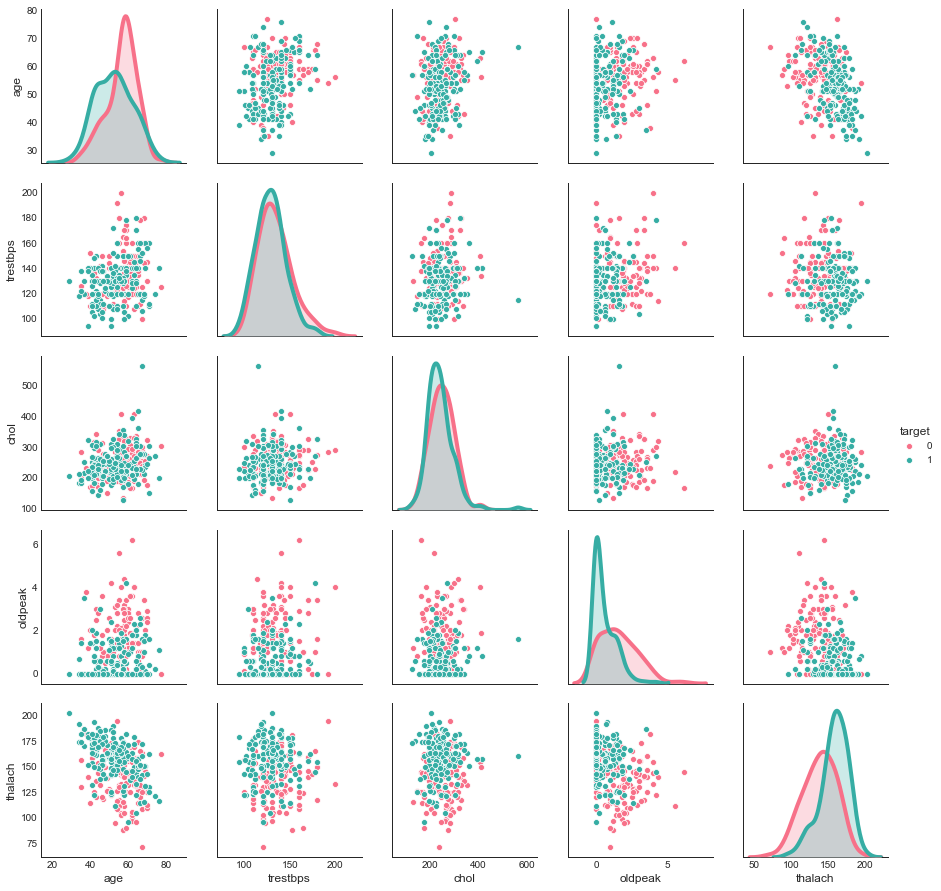

In [373]:
#data['target'] = data['target'].astype(str)
sn.pairplot(data,vars=['age','trestbps','chol','oldpeak','thalach'],hue='target',palette="husl")

#### Heatmap (Correlation)<a id='22'>

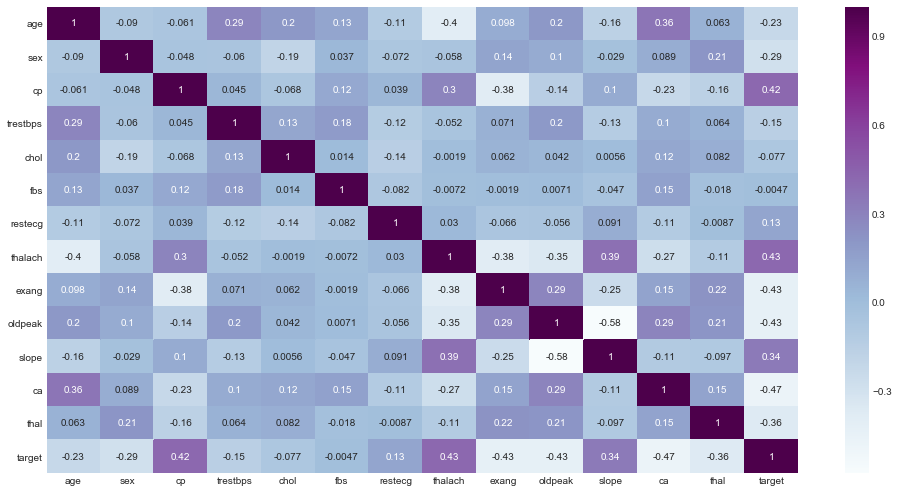

In [374]:
columns = list(data.columns)
columns.remove('Group_Age')

plt.figure(figsize=(15,8))
sn.heatmap(data[columns].corr(),annot=True,cmap='BuPu')

**Findings :**

- There is no multicolinearty among features
- thalach,slope, cp are postively corelated with our target variable 
- thal,ca, oldpeak, exang are negatively corelated with our target variable


### Encoding Features<a id='23'>

In [375]:
catagorical_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

for items in catagorical_features:
    data[items] = data[items].astype('category')#convert the catagorical variable which are actually catagorical into dummy variable

target = data['target']
data = data.drop(['target','Group_Age'],axis=1)

#### Convert into dummy variables
data_encoded = pa.get_dummies(data[data.columns],drop_first=True)

##### Recursive Feature Elimination<a id='24'>

In [376]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data_encoded,target,test_size=0.3,random_state=42)

random_class = RandomForestClassifier(random_state=42)

rfcev  = RFECV(estimator=random_class,step=1,cv=5,scoring='accuracy')

rfcev_model = rfcev.fit(X_train,Y_train)

print("The optimal number of features is {}".format(rfcev_model.n_features_))
print("Best Features:",X_train.columns[rfcev_model.support_])

The optimal number of features is 19
Best Features: Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'exang_1', 'slope_1', 'slope_2',
       'ca_1', 'ca_2', 'ca_3', 'thal_2', 'thal_3'],
      dtype='object')


In [377]:
optimal_features = list(data_encoded.columns[rfcev_model.support_])
data_encoded = data_encoded[optimal_features]
scores = []

### Modelling<a id='25'>

#### Standardzize the data

In [378]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data_encoded = standard_scaler.fit_transform(data_encoded[['age','trestbps','chol','thalach','oldpeak']])

In [379]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgm

In [380]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [381]:
class model_creation:
    def __init__(self,model_name,model,estimators,cv=5):
        self.model_name = model_name
        self.model = model
        self.estimators = estimators
        self.cv = cv
        
    def training(self):
        X_train,X_test,Y_train,Y_test = train_test_split(data_encoded,target,test_size = 0.3,random_state=42)
        cross_val = StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=42)#Cross validation
        scoring = 'roc_auc'
        best_model = self.hyper_parameter_tuning(X_train,Y_train,cross_val,scoring)
        helper_function = self.helper_function(X_train,Y_train,X_test,Y_test,best_model,scoring)
        
        return best_model
        
    def hyper_parameter_tuning(self,X_train,Y_train,cross_val,scoring):
        
        grid_model_initialize = RandomizedSearchCV(self.model,self.estimators,cv=cross_val,scoring=scoring)
        grid_model = grid_model_initialize.fit(X_train,Y_train)
        return grid_model,grid_model.best_score_
    
    def helper_function(self,X_train,Y_train,X_test,Y_test,best_model,scoring):
        
        final_model = best_model[0].best_estimator_.fit(X_train,Y_train)
        scores  = cross_val_score(final_model,X_train,Y_train,cv=5,scoring=scoring,verbose=0)
        
        cross_mean = scores.mean()
        cross_std = scores.std()
        
        test_score = final_model.score(X_test,Y_test)
        
        ## Draw Confusion Matrix.
        fig, (axis1,axis2) = plt.subplots(1,2,figsize=(14,5))

    
        predicted_value = best_model[0].best_estimator_.predict(X_test)
        cm = metrics.confusion_matrix(Y_test,predicted_value)
        sn.heatmap(cm,annot=True,fmt=".2f",cmap="Greens",ax=axis1).set_title("Confusion Matrix") 
        
        ## Draw Roc Curve
    
        test_results_df = pa.DataFrame({'actual':Y_test})
        test_results_df = test_results_df.reset_index()

        predict_probabilites = pa.DataFrame(best_model[0].best_estimator_.predict_proba(X_test))
        test_results_df['chd_1'] = predict_probabilites.iloc[:,1:2]

        fpr,tpr,thresholds = metrics.roc_curve(test_results_df.actual,test_results_df.chd_1,drop_intermediate=False)

        auc_score = metrics.roc_auc_score(test_results_df.actual,test_results_df.chd_1)

        plt.plot(fpr,tpr,label="ROC Curve (area = %.2f)"% auc_score)
        plt.plot([0,1],[0,1],'k--')
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc='lower right')

        ## print classification rreport

        print(metrics.classification_report(Y_test,predicted_value))
        

#### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.66      0.83      0.73        35
           1       0.87      0.72      0.79        54

    accuracy                           0.76        89
   macro avg       0.76      0.78      0.76        89
weighted avg       0.79      0.76      0.77        89



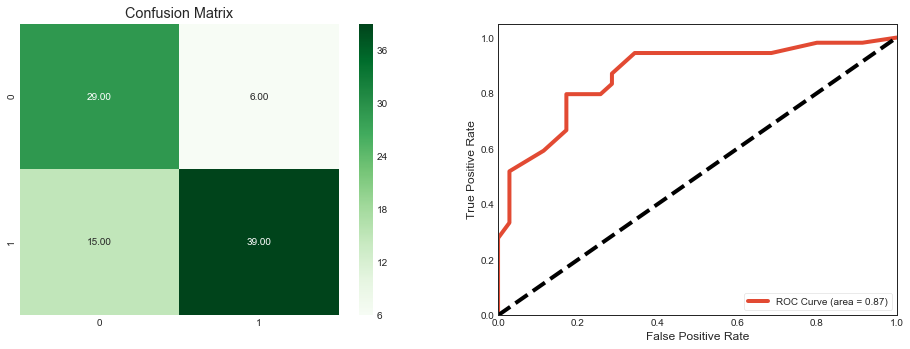

In [382]:
random = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)] #Boosting parameters
max_features = ['auto', 'sqrt']# Boosting Parameters
max_depth = [int(x) for x in np.linspace(10,200,num=20)] #Max depth of the tree
max_depth.append(None)
bootstrap = [True,False] # Bootstrap here means how the samples will be chosen with or without replacement

# Total Combination 10*2*20*2 = 800 !

param_grid = {'n_estimators':[10,20,30],
              'max_features':max_features,
              'bootstrap':bootstrap}

radnomobj = model_creation('RF',random,param_grid)
random_mod = radnomobj.training()
scores.append(random_mod[1])

#### KNN Classifier

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        35
           1       0.87      0.74      0.80        54

    accuracy                           0.78        89
   macro avg       0.77      0.78      0.77        89
weighted avg       0.79      0.78      0.78        89



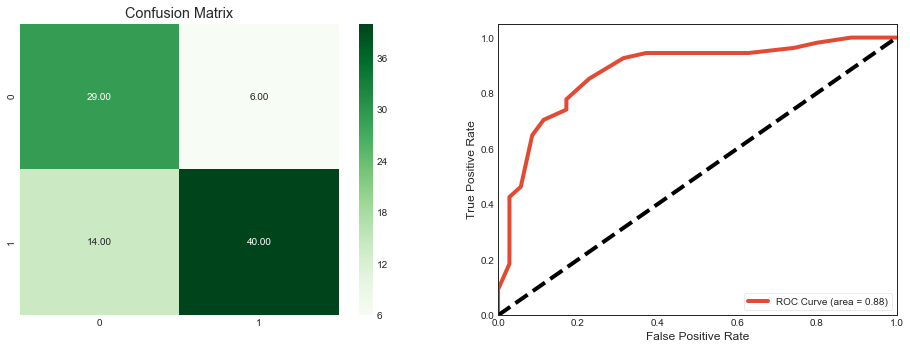

In [383]:
param_grid = {'n_neighbors':[x for x in range(1,40)],'weights':['uniform','distance']}

knn_model =  KNeighborsClassifier()

knnobj = model_creation('KNN',knn_model,param_grid)
knn_mod = knnobj.training()
scores.append(knn_mod[1])

#### Logistic Regression

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        35
           1       0.89      0.74      0.81        54

    accuracy                           0.79        89
   macro avg       0.79      0.80      0.78        89
weighted avg       0.81      0.79      0.79        89



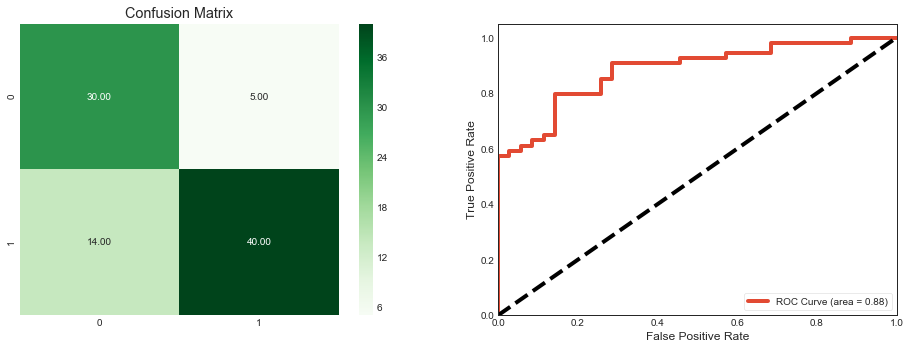

In [384]:
logit_model = LogisticRegression()

param_grid = {'C':[0.001,0.01,0.05,1,100],'penalty':['l1','l2']}

logitobj = model_creation('Logit',logit_model,param_grid)
logit_mod = logitobj.training()
scores.append(logit_mod[1])

#### Adaboost Classifier

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        35
           1       0.86      0.89      0.87        54

    accuracy                           0.84        89
   macro avg       0.84      0.83      0.83        89
weighted avg       0.84      0.84      0.84        89



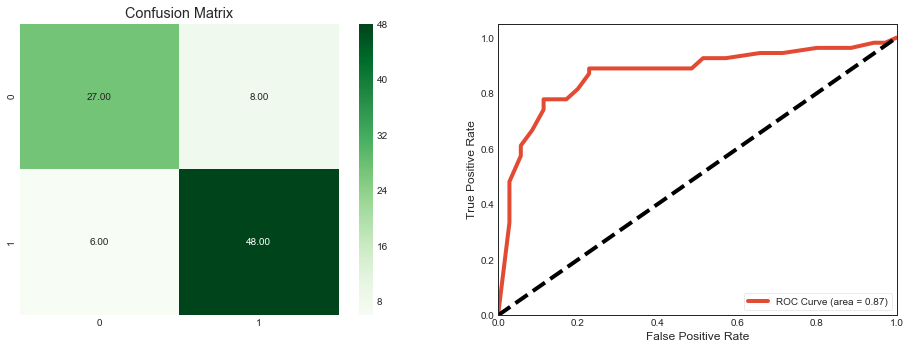

In [385]:
ada_model = AdaBoostClassifier()

param_grid = {'n_estimators':[int(x) for x in np.linspace(start=20,stop=300,num=15)],
              'learning_rate':np.arange(.1,4,.3)}

adaobj = model_creation('ADA',ada_model,param_grid)
ada_mod = adaobj.training()
scores.append(ada_mod[1])

#### Gradient Boost Classifier

              precision    recall  f1-score   support

           0       0.70      0.80      0.75        35
           1       0.86      0.78      0.82        54

    accuracy                           0.79        89
   macro avg       0.78      0.79      0.78        89
weighted avg       0.80      0.79      0.79        89



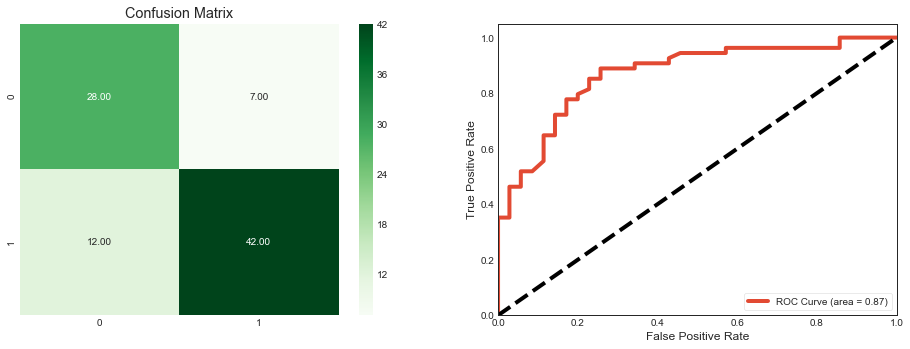

In [386]:
n_estimators = [int(x) for x in np.linspace(start=20,stop=120,num=6)]
learning_rate = [0.1,0.01,0.05,0.001]
max_depth= np.arange(2,5,1)


param_grid = {'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth}

grad_model = GradientBoostingClassifier()

grad_obj = model_creation('GRAD_BOOST',grad_model,param_grid)
grad_mod = grad_obj.training()
scores.append(grad_mod[1])

#### XGBoost Classifier

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        35
           1       0.87      0.74      0.80        54

    accuracy                           0.78        89
   macro avg       0.77      0.78      0.77        89
weighted avg       0.79      0.78      0.78        89



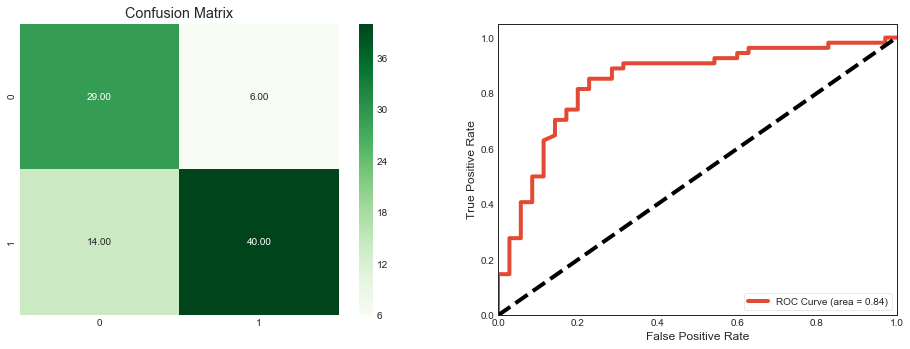

In [387]:
from xgboost.sklearn import XGBClassifier

param_grid = {'max_depth':range(3,8,2),'min_child_weight':range(1,10,2),'gamma':[0.5,1,1.5,2,5],
              'subsample':[0.6,0.8,1.0],'colsample_bytree':[0.6,0.8,1.0]}

xgboost_model = XGBClassifier(learning_rate=0.025,n_estimators=600,objective='binary:logistic',silent=True,nthread=1)

xgb_obj = model_creation('XGBOOST',xgboost_model,param_grid)
xgb_mod = xgb_obj.training()
scores.append(xgb_mod[1])

### Compare Models(Based on scores)<a id='26'>

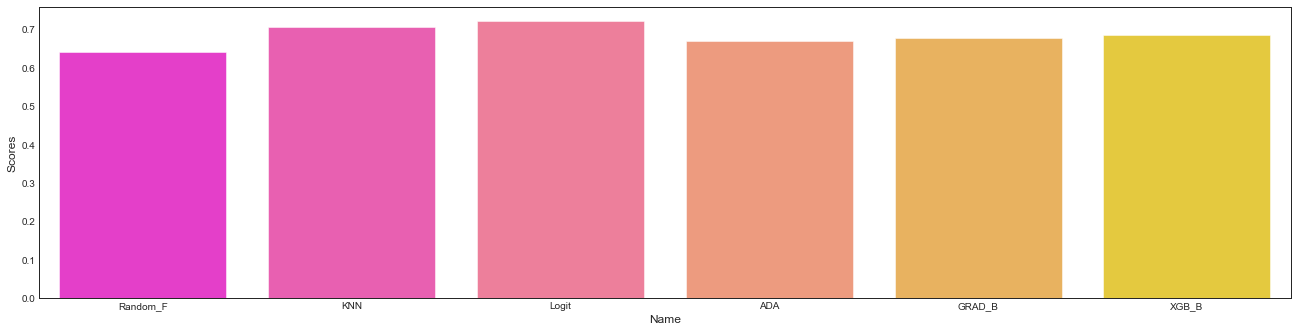

In [388]:
model_scores = pa.DataFrame({'Name':['Random_F','KNN','Logit','ADA','GRAD_B','XGB_B'],'Scores':scores})
plt.figure(figsize=(20,5))
sn.barplot(x='Name',y='Scores',data=model_scores,palette='spring')

- Knn and Logistic Regression is performing better than others.